In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [3]:
train_dir = "/content/drive/MyDrive/xray_dataset/train"
test_dir = "/content/drive/MyDrive/xray_dataset/test"
classes_train=os.listdir(train_dir)
classes_test=os.listdir(test_dir)

In [4]:
print(classes_train)

['NORMAL', 'PNEUMONIA']


In [5]:
print(classes_test)

['PNEUMONIA', 'NORMAL']


In [6]:
# First for Training data
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator( # The ImageDataGenerator class allows your model to receive new variations of the images at each epoch.
    zoom_range=0.2, # The amount of zooming u need
    horizontal_flip=True, # Make a horizontal copy of image
    rescale=1.0/255.0, # convert the pixels in range [0,255] to range [0,1]
    width_shift_range=0.10, # The percentage of Width shifitning (Vertical)
    height_shift_range=0.10, # The percentage of height shifitning (Horizontal)
    shear_range=0.1 # Shear angle in counter-clockwise direction in degrees
)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    class_mode='binary', # 1D binary lables.
    color_mode='rgb',
    batch_size=32,
    target_size=(1000,1000,3)[:2] # The dimensions to which all images found will be resized.
)

Found 148 images belonging to 2 classes.


In [7]:
# Second for Testing data
test_datagen=ImageDataGenerator(
    rescale=1.0/255.0
)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size=32,
    target_size=(1000,1000,3)[:2]
)

Found 40 images belonging to 2 classes.


In [8]:
from tensorflow import keras
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

earlystop=EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3, # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1, # prints a message to stdout for each update
    factor=0.5, # Factor by which the learning rate will be reduced. new_lr = lr * factor
    min_lr=0.00001
)

In [9]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization

model=Sequential()


model.add(Conv2D(32,(5,5),activation='relu',input_shape=(1000,1000,3)))
# 32 is the number of filters, (5,5) is the strides,activation function is relu and input_shape
#is the size of the image
model.add(MaxPooling2D(5,5))
#(5,5) is the pool size

model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(5,5)) # Max pooling is a pooling operation that selects the maximum element
# from the region of the feature map covered by the filter. Thus, the output after max-pooling layer
# would be a feature map containing the most prominent features of the previous feature map.


model.add(Conv2D(128,(5,5),activation='relu'))
model.add(MaxPooling2D(5,5))


model.add(Flatten())
# The flatten layer is used to convert the feature map that it received from the max-pooling layer
# into a format that the dense layers can understand
model.add(Dense(128,activation='relu'))

model.add(Dense(1,activation='sigmoid'))
# 1 the number of outputs

In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 996, 996, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 199, 199, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 195, 195, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 39, 39, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 35, 35, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 128)         0

In [11]:
callbacks = [earlystop, learning_rate_reduction]

In [27]:
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/10
5/5 [==============================] - 288s 50s/step - loss: 0.3250 - accuracy: 0.8649 - val_loss: 0.0810 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 2/10
5/5 [==============================] - 266s 48s/step - loss: 0.2614 - accuracy: 0.8784 - val_loss: 0.0752 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 3/10
5/5 [==============================] - 271s 49s/step - loss: 0.4133 - accuracy: 0.8378 - val_loss: 0.0499 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 4/10
5/5 [==============================] - ETA: 0s - loss: 0.2634 - accuracy: 0.8986 
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
5/5 [==============================] - 270s 56s/step - loss: 0.2634 - accuracy: 0.8986 - val_loss: 0.1025 - val_accuracy: 0.9750 - lr: 5.0000e-04
Epoch 5/10
5/5 [==============================] - 269s 50s/step - loss: 0.2514 - accuracy: 0.9054 - val_loss: 0.0651 - val_accuracy: 1.0000 - lr: 2.5000e-04
Epoch 6/10
5/5 [==============================] - 277s 50

In [28]:
losses = pd.DataFrame(model.history.history)
losses.head(10)

,loss,accuracy,val_loss,val_accuracy,lr
0,0.324974,0.864865,0.081036,1.000,0.000500
1,0.261413,0.878378,0.075209,1.000,0.000500
2,0.413280,0.837838,0.049907,1.000,0.000500
3,0.263362,0.898649,0.102511,0.975,0.000500
4,0.251425,0.905405,0.065085,1.000,0.000250
5,0.230071,0.918919,0.077307,0.975,0.000250
6,0.196495,0.945946,0.047091,1.000,0.000250
7,0.207935,0.905405,0.048576,1.000,0.000125
8,0.205988,0.925676,0.041768,1.000,0.000125
9,0.209846,0.898649,0.040722,1.000,0.000125


<Axes: >

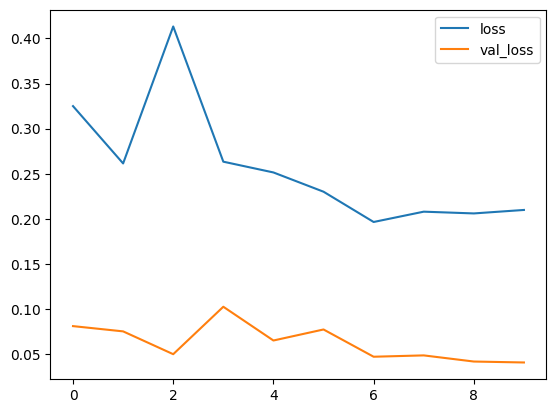

In [29]:
losses[['loss','val_loss']].plot()

<Axes: >

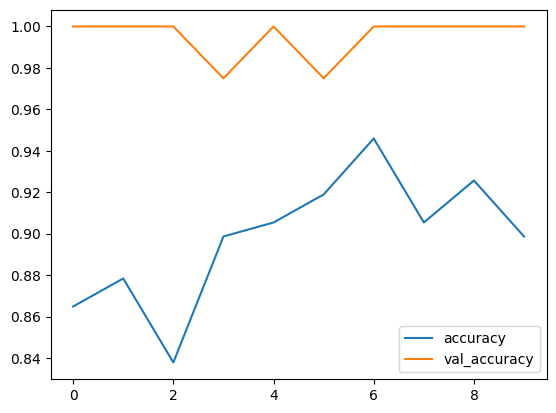

In [30]:
 losses[['accuracy','val_accuracy']].plot()

<Axes: >

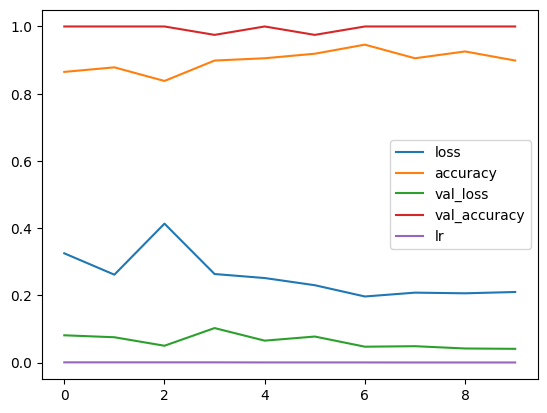

In [31]:
losses.plot()

In [32]:
model.evaluate(test_generator, verbose=1)

2/2 [==============================] - 22s 3s/step - loss: 0.0407 - accuracy: 1.0000


[0.040721915662288666, 1.0]

In [33]:
model_pred=model.predict(test_generator)
print(model_pred)

2/2 [==============================] - 19s 3s/step
[[0.00119194]
 [0.00452455]
 [0.00629778]
 [0.2953499 ]
 [0.00674149]
 [0.16655944]
 [0.09802837]
 [0.97398895]
 [0.97130907]
 [0.99353397]
 [0.0084706 ]
 [0.98861676]
 [0.8947758 ]
 [0.0040022 ]
 [0.04863448]
 [0.9638249 ]
 [0.9771316 ]
 [0.01420034]
 [0.997009  ]
 [0.01814431]
 [0.99377865]
 [0.99298793]
 [0.00517971]
 [0.05123394]
 [0.02287639]
 [0.01651605]
 [0.0072405 ]
 [0.00563439]
 [0.99262315]
 [0.99773985]
 [0.00790998]
 [0.99894536]
 [0.75967675]
 [0.00158936]
 [0.97437567]
 [0.9854504 ]
 [0.9779317 ]
 [0.9433085 ]
 [0.9126864 ]
 [0.9994462 ]]


In [34]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [35]:
class_names=['NORMAL','PNEUMONIA']

In [36]:
import matplotlib.pyplot as plt
import numpy as np
def plot_prediction(test_generator, n_images):
    """
    Test the model on random predictions
    Args:
    generator: a generator instance
    n_images : number of images to plot

    """
    i = 1
    images, labels = test_generator.next()
    predictions = np.argmax(model.predict(images), axis=1)
    labels = labels.astype('int32')
    plt.figure(figsize=(14, 15))
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        if predictions[i] == labels[i]:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='g')
            plt.axis('off')
        else:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='r')
            plt.axis('off')
        i += 1
        if i == n_images:
            break

    plt.show()


1/1 [==============================] - 5s 5s/step


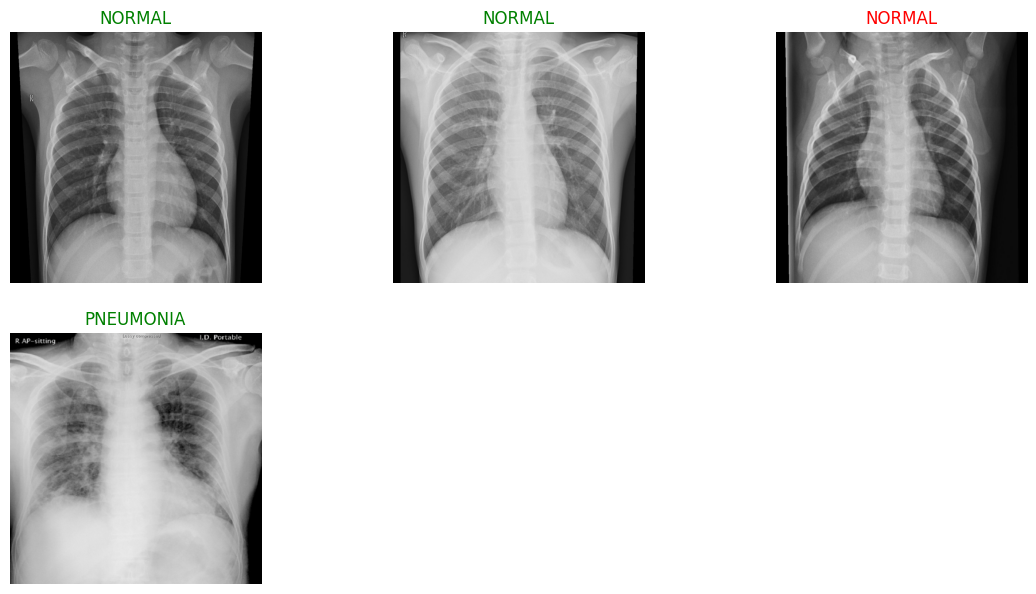

In [24]:
plot_prediction(test_generator,5)